# Kết luận:
- Các band từ 6 đến 12 ảnh hưởng mạnh tới mask 
- Việc lấy blur hoặc gradient cũng ảnh hưởng mạnh tới Mask 



- band_06        0.000921
- band_07        0.000833
- band_08        0.000918
- band_09        0.000754
- band_10        0.000783
- band_11        0.000882
- band_12        0.000787
- Gray           0.000725
- Blur_Mean      0.000903
- Blur_Median    0.000894
- Gradient_X     0.000945
- Gradient_Y     0.000784
- Mask           1.000000
Name: 32, dtype: float64

# Ý tưởng: 
- chỉ lấy các original band 6--> 12, gradient band, 
- Tạo thêm các feature từ các band này ( gồm cộng trừ nhân chia)

In [1]:
import h5py 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 


In [2]:
def read_file(file_path:str)->np.ndarray:
    """
    Read h5py file from file_path 
    ### Arguments:
        file_path(str): file path
    ### Returns:
        data file (np.array) of file_path
    """
    with h5py.File(file_path) as f:
        # Access the dataset 
        print(f.keys())
        image = f[list(f.keys())[0]]
        image = np.asarray(image) # (128,128,14)
    return image

In [3]:
# DATA_PATH ='../dataset/train'
IMAGES_PATH='../dataset/train/img'
MASKS_PATH='../dataset/train/mask'
data_dict = dict()
for idx,file_name in enumerate(os.listdir(IMAGES_PATH)):
    img_path = os.path.join(IMAGES_PATH,file_name)
    mask_path=os.path.join(MASKS_PATH,file_name.replace('image','mask'))
    image = read_file(img_path)
    mask = read_file(mask_path)
    data_dict[idx]=(image,mask)

<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5

statistic info:mins:[0.92551588 0.86826639 0.78382149 0.68512706 0.69055396 0.46131926
 0.51773986 0.2972201  0.84411881 0.88418563 0.51437033 0.43854252
 0.         0.        ]
means:[0.95331522 0.95463817 1.03676181 0.9817524  1.14160832 1.31685438
 1.31392276 1.32210622 1.45390253 1.10691848 1.19418812 1.15427785
 0.67237295 0.02105713]
maxs"[1.09550859 1.965726   2.72377967 5.06544763 3.71598542 1.97579033
 2.04035411 2.15574715 1.91076454 1.32627844 2.94528629 4.29887073
 2.02047255 1.        ]
stds:[0.02070455 0.05615097 0.11498307 0.32688868 0.22056942 0.19717254
 0.21917815 0.24798986 0.19933476 0.09311067 0.24443346 0.36912645
 0.3259618  0.14357481]


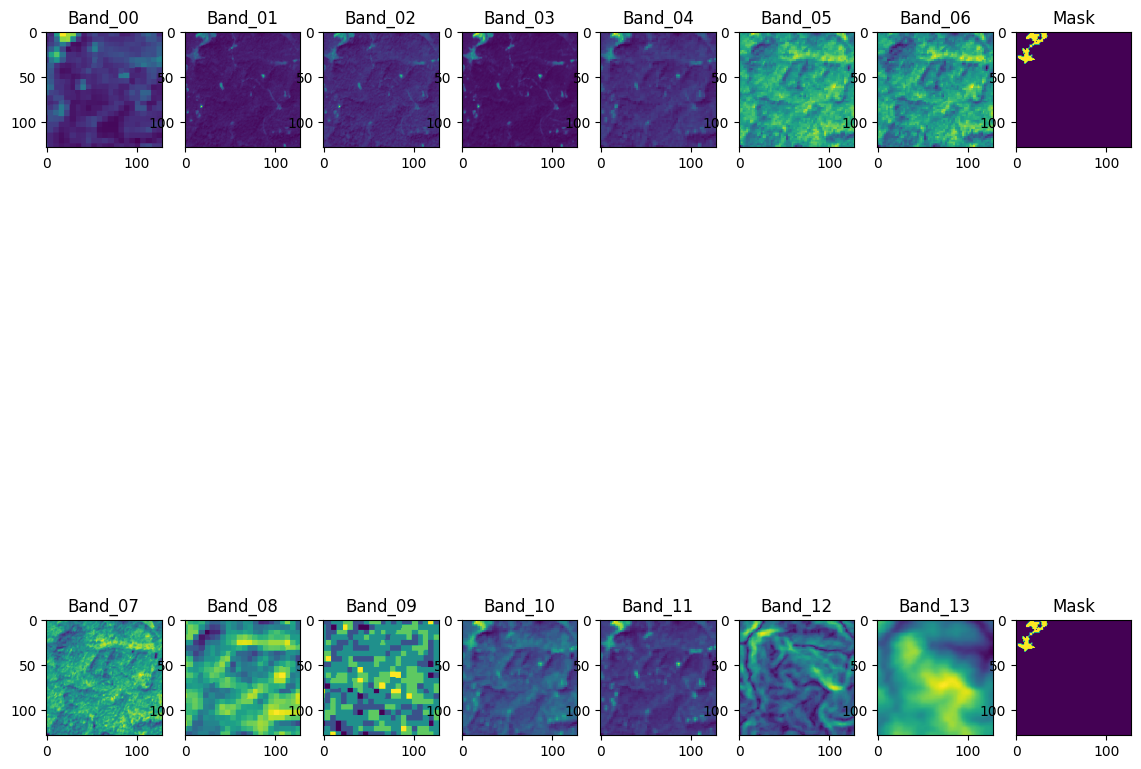

In [4]:
# Visualize band of data_dict 
def visualize(data_dict:dict,idx=0):
    """
    Visualize 14 bands of data and mask of data given index 
    ### Arguments:
        data_dict(dictionary): data source 
        idx(int): index of 14 bands and mask data
    """
    img,mask = data_dict[idx]
    figure,axes= plt.subplots(nrows=2,ncols=8, figsize=(14, 14)) 
    # plt.figure(figsize=(16,16))
    for row in range(2):
        for col in range(7):
            idx = row*7+col 
            title = f'Band_{idx:02d}'
            axes[row,col].imshow(img[...,idx])
            axes[row,col].set_title(title)
    axes[1,7].imshow(mask)
    axes[1,7].set_title('Mask')
    axes[0,7].imshow(mask)
    axes[0,7].set_title('Mask')
    
    means = np.mean(img,axis=(0,1))[...,np.newaxis]
    means[-1]=np.mean(mask)
    stds = np.std(img,axis=(0,1))[...,np.newaxis]
    stds[-1]=np.std(mask)
    mins = np.min(img,axis=(0,1))[...,np.newaxis]
    mins[-1]=np.min(mask)
    maxs = np.expand_dims(np.max(img,axis=(0,1)),axis=-1)
    maxs[-1]=np.max(mask)
    print(f'statistic info:mins:{mins.flatten()}\nmeans:{means.flatten()}\nmaxs"{maxs.flatten()}\nstds:{stds.flatten()}')
    plt.show() 
visualize(data_dict=data_dict)


In [5]:
def add_feature_LV2(image:np.ndarray)->np.ndarray:
    """
    From each feature LV1, we add some feature LV2 by manipulating them using oprations such as 
    multiply, subtract between band 4, band 5, band 12
    """
    band_04 = np.copy(image[...,3])
    band_05 = np.copy(image[...,4])
    band_12 = np.copy(image[...,11])

    # Calculate each new layer 
    band_04_04 = band_04**2
    band_04_04_04 = band_04**3
    band_05_05 = band_05**2
    band_05_05_05=band_05**3 
    band_04_a_05 = band_04+band_05
    band_04_a_12 = band_04+band_12 
    band_05_a_12 = band_05+band_12 
    band_04_m_05 = band_04*band_05 
    band_04_m_12 = band_04*band_12 
    band_05_m_12 = band_05*band_12 
    band_04_m_05_m_12=band_04*band_05_m_12 

    # Add channel axis for each layer 
    band_04_04 = band_04_04[...,np.newaxis]
    band_04_04_04 = band_04_04_04[...,np.newaxis]
    band_05_05 = band_05_05[...,np.newaxis] 
    band_05_05_05=band_05_05_05[...,np.newaxis]
    band_04_a_05=band_04_a_05[...,np.newaxis] 
    band_04_a_12=band_04_a_12[...,np.newaxis]
    band_05_a_12=band_05_a_12[...,np.newaxis]
    band_04_m_05=band_04_m_05[...,np.newaxis]
    band_04_m_12=band_04_m_12[...,np.newaxis]
    band_05_m_12=band_05_m_12[...,np.newaxis]
    band_04_m_05_m_12=band_04_m_05_m_12[...,np.newaxis]

    return np.concatenate((image,band_04_04,band_04_04_04,band_05_05,band_05_05_05,
                           band_04_a_05,band_04_a_12,band_05_a_12,
                           band_04_m_05,band_04_m_12,band_05_m_12,
                           band_04_m_05_m_12),axis=-1)


In [4]:
# Calculate correlation between each channel and mask 
def corr(img:np.ndarray,mask:np.ndarray)->np.ndarray:
    """
    Calculate cross correlation between image and mask 
    ### Arguments:
        img(np.ndarray): image with multiple channels 
        mask(np.ndarray): mask of image 
    ### Returns:
        correlation of each channel and image 
    """
    w,h,c= img.shape
    data = np.reshape(img,(-1,c)).T
    mask = np.reshape(mask,(-1,1)).T
    # print('data.shape',data.shape,'mask.shape',mask.shape)
    
    # 1. concat all data 
    data = np.concatenate((data,mask),axis=0)


    # 2. Normalize data 
    data_len = np.sqrt(np.sum(data**2,axis =1))[...,np.newaxis]
    data /=data_len 

    # 3. return cosine similarity of 2 vector 
    return np.matmul(data,data.T)


In [5]:
n_img = len(data_dict)
corr_dict=None
n_landslide = 0
for idx in range(n_img):
    img,mask = data_dict[idx]
    # features = add_feature_LV1(img)
    # features = add_feature_LV2(img)
    if np.sum(mask)>0:
        corrs = corr(img,mask)
        # del features
        corr_dict = corr_dict + corrs if corr_dict is not None else corrs 
        n_landslide +=1 
        # del corrs 
        # corr_dict[idx]=(img,mask,corrs)
print(f'num of landslide[/total img:{n_landslide}/{len(data_dict)}')

num of landslide[/total img:2231/3799


In [6]:
corr_dict.shape

(15, 15)

In [7]:
column_names = [f'band_{x:02d}' for x in range(1,15)]+ ['Mask']
df = pd.DataFrame(data = corr_dict/n_landslide, columns = column_names)
df.head()

,band_01,band_02,band_03,band_04,band_05,band_06,band_07,band_08,band_09,band_10,band_11,band_12,band_13,band_14,Mask
0,1.000000,0.993553,0.977625,0.928526,0.949306,0.936668,0.930961,0.919992,0.941989,0.982527,0.924188,0.902981,0.935049,0.982806,0.198188
1,0.993553,1.000000,0.993024,0.961353,0.967387,0.938309,0.930213,0.920469,0.937331,0.975179,0.935992,0.928082,0.921195,0.969450,0.240499
2,0.977625,0.993024,1.000000,0.980653,0.986535,0.951778,0.942375,0.935856,0.942379,0.963723,0.957658,0.957213,0.896937,0.947653,0.265835
3,0.928526,0.961353,0.980653,1.000000,0.973763,0.901888,0.887668,0.880432,0.886154,0.911114,0.933099,0.962976,0.837924,0.884284,0.346766
4,0.949306,0.967387,0.986535,0.973763,1.000000,0.969558,0.960159,0.952353,0.952913,0.945688,0.983540,0.984146,0.862400,0.917473,0.266916


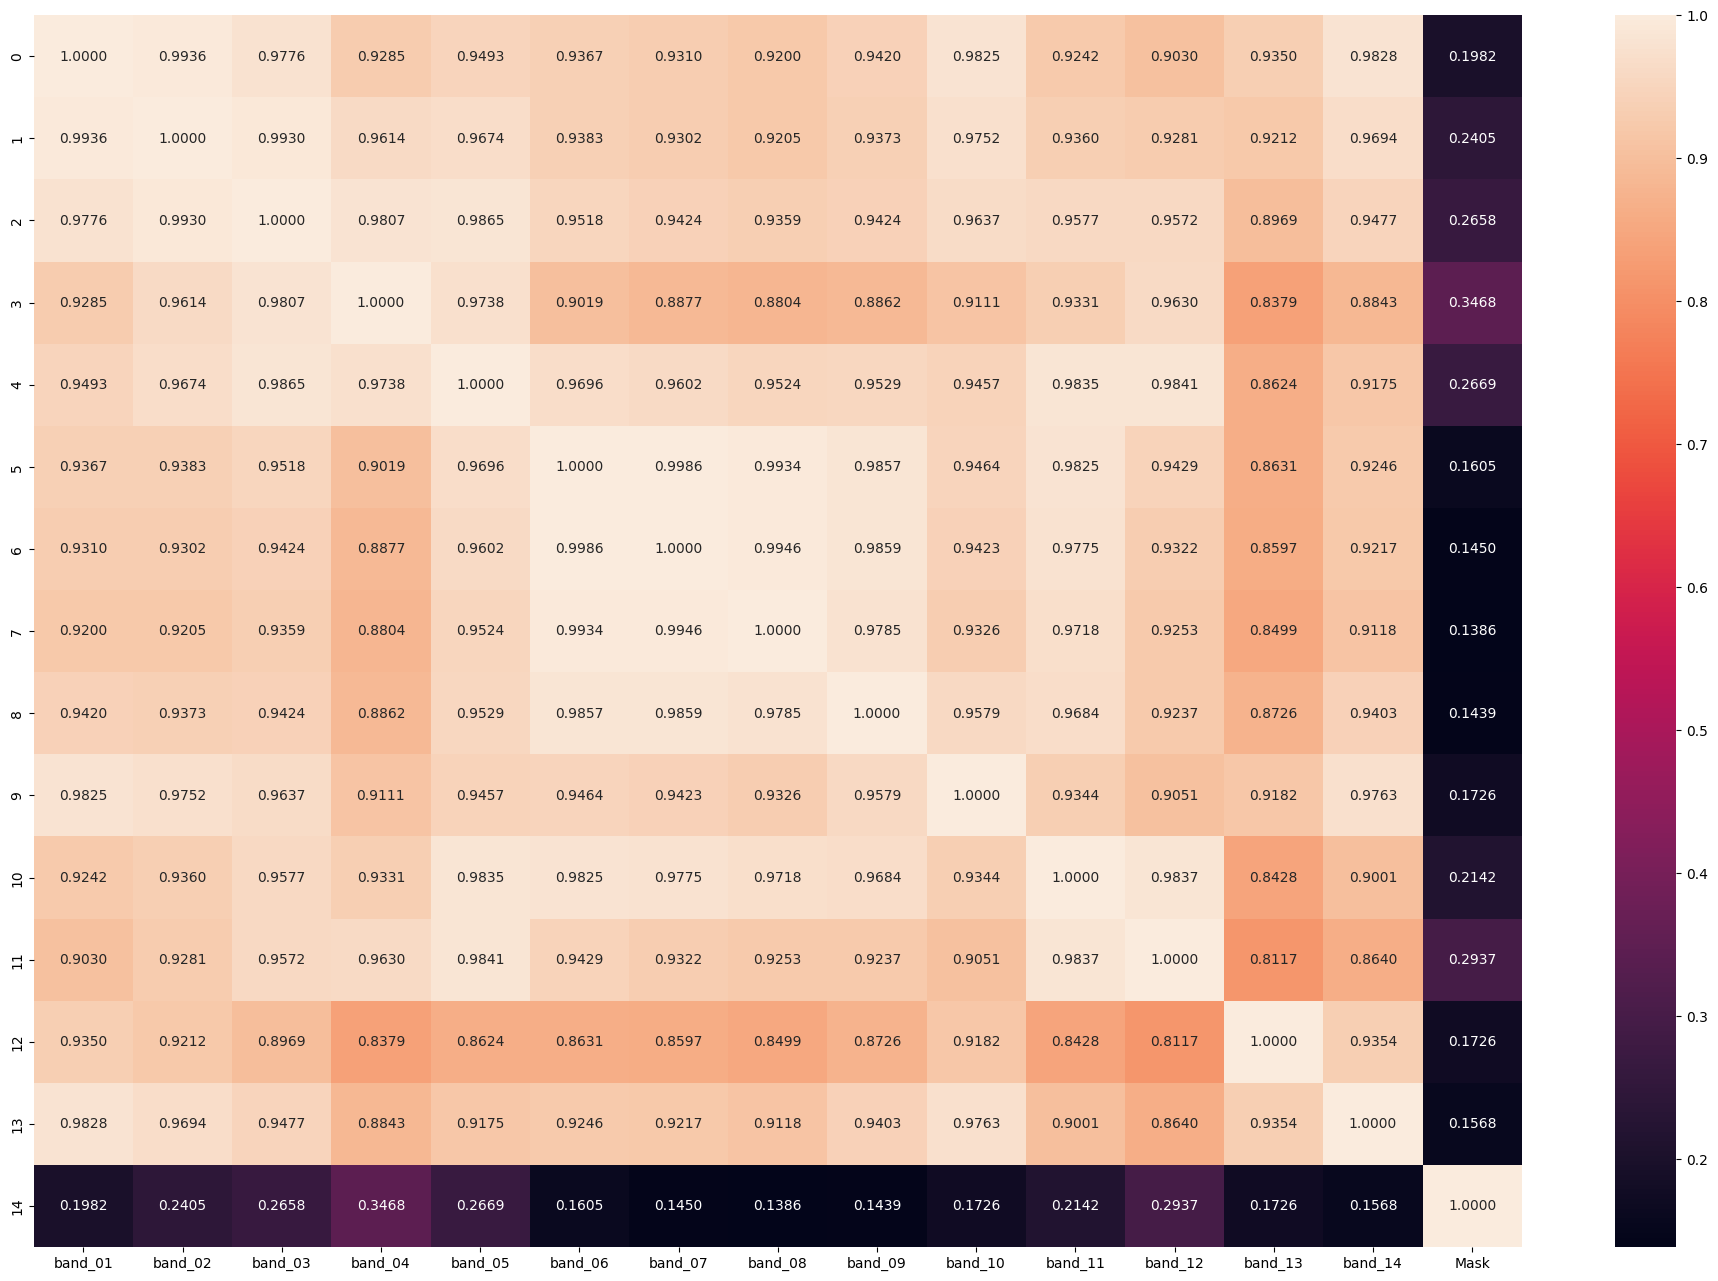

In [8]:
plt.figure(figsize=(24,16))
sns.heatmap(data=df,fmt='.4f',annot=True)
plt.show()

### Nhận xét


1. Việc tạo các feature bậc cao từ các feature gốc có cosine similarity cao với mask tạo thành các feature bậc cao (2, 3), có 
cosine similarity rất lớn (khả năng rất tốt cho việc segmentation)
2. Các feature polynomial này cũng không có độ tương quan cao với các feature gốc tạo ra nó, như vậy ta sẽ có được sự đa dạng feature
, nói chung là tốt cho segmentation
3. Các feature được sinh ra theo lý thuyết các band trong vệ tinh không đóng góp nhiều vào cosine similarity, như vậy có lẽ không nên sinh ra các feature này


In [6]:
# Lưu lại các feature này cho training 
NEW_DATA_PATH = '../Landslide4Sense_dataset'
if not os.path.exists(NEW_DATA_PATH):
    os.mkdir(NEW_DATA_PATH)


TRAIN_PATH = os.path.join(NEW_DATA_PATH,'train')
if not os.path.exists(TRAIN_PATH):
    os.mkdir(TRAIN_PATH)

TRAIN_IMG_PATH = os.path.join(NEW_DATA_PATH,'train','img')

if not os.path.exists(TRAIN_IMG_PATH):
    os.mkdir(TRAIN_IMG_PATH)


TRAIN_MASK_PATH = os.path.join(NEW_DATA_PATH,'train','mask')

if not os.path.exists(TRAIN_MASK_PATH):
    os.mkdir(TRAIN_MASK_PATH)

In [7]:
n_img = len(data_dict)
corr_dict=None
n_landslide = 0
for idx in range(n_img):
    img,mask = data_dict[idx]
    img  = add_feature_LV2(img)
    with h5py.File(os.path.join(TRAIN_IMG_PATH,f'image_{idx:04d}.h5'),'w') as f_img:
        f_img.create_dataset('img',data=img)
    with h5py.File(os.path.join(TRAIN_MASK_PATH,f'mask_{idx:04d}.h5'),'w') as f_mask:
        f_mask.create_dataset('mask',data=mask)
 
    
    

In [8]:
# DATA_PATH ='../dataset/train'
IMAGES_PATH='../Landslide4Sense_dataset/train/img'
MASKS_PATH='../Landslide4Sense_dataset/train/mask'
data_dict = dict()
for idx,file_name in enumerate(os.listdir(IMAGES_PATH)):
    print(file_name)
    img_path = os.path.join(IMAGES_PATH,file_name)
    mask_path=os.path.join(MASKS_PATH,file_name.replace('image','mask'))
    image = read_file(img_path)
    mask = read_file(mask_path)
    data_dict[idx]=(image,mask)

image_3581.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1184.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1361.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1568.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1823.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1869.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_3124.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_0846.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_2748.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1702.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1514.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_3627.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1712.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_0766.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_2119.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_1430.h5
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
image_3567.h5
<KeysViewH

statistic info:mins:[0.89043802 0.81369657 0.72202018 0.63795438 0.55275283 0.4070464
 0.37440498 0.29103874 0.97466794 0.88418563 0.38330913 0.38083955
 0.         1.51132566 0.40698579 0.25963837 0.30553569 0.16888572
 1.19070721 1.01879394 0.93359239 0.35263109 0.24295826 0.21051014
 0.        ]
means:[0.93580517 0.95620522 1.10345437 1.09268603 1.38191487 1.37916128
 1.3055347  1.32229024 1.60057644 1.17024806 1.35420556 1.39316579
 0.50326834 1.58867723 1.26647813 1.56396212 1.97359391 2.90884405
 2.4746009  2.48585182 2.77508066 1.57137788 1.65350947 2.04647134
 0.        ]
maxs"[ 1.03524663  1.22115119  1.57819442  2.5248617   2.10882173  2.07206003
  1.95465924  2.12123459  1.95823695  1.54732485  2.50901408  3.30445634
  2.71039     1.80375683  6.37492662 16.09580808  4.44712908  9.37820242
  4.59187859  5.60533199  5.39859291  5.21893179  7.60698897  6.92462401
  0.        ]
stds:[0.02486383 0.05326321 0.10635256 0.26928679 0.25279477 0.17271728
 0.17638008 0.19798701 0.13706

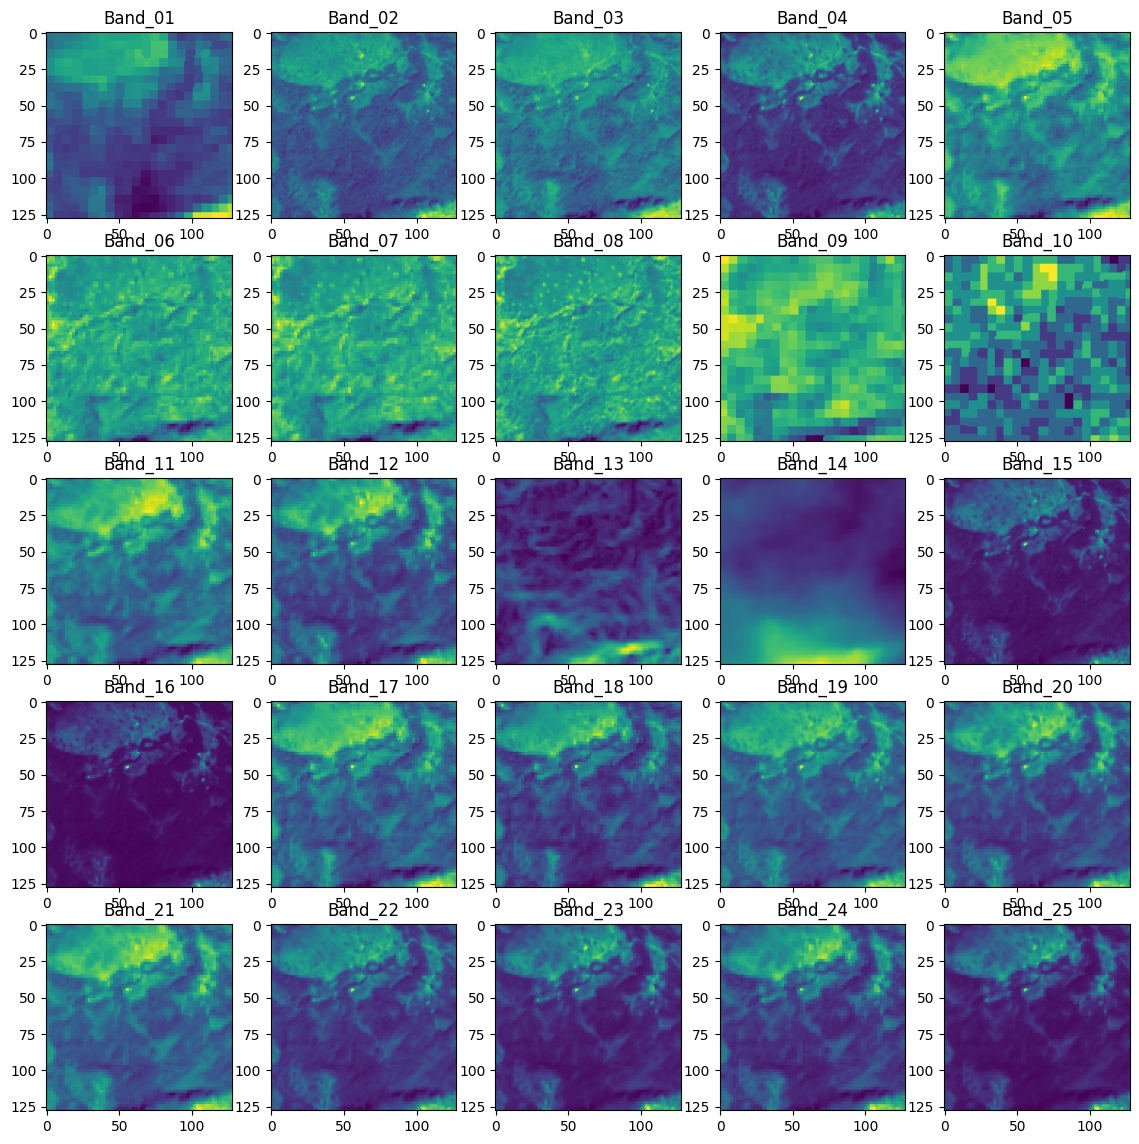

In [9]:
# Visualize band of data_dict 
def visualize(data_dict:dict,idx=0):
    """
    Visualize 14 bands of data and mask of data given index 
    ### Arguments:
        data_dict(dictionary): data source 
        idx(int): index of 14 bands and mask data
    """
    img,mask = data_dict[idx]
    figure,axes= plt.subplots(nrows=5,ncols=5, figsize=(14, 14)) 
    # plt.figure(figsize=(16,16))
    for row in range(5):
        for col in range(5):
            idx = row*5+col 
            if idx<25:
                title = f'Band_{(idx+1):02d}'
                axes[row,col].imshow(img[...,idx])
                axes[row,col].set_title(title)
            else:
                axes[row,col].imshow(mask)
                axes[row,col].set_title('Mask')
    
    means = np.mean(img,axis=(0,1))[...,np.newaxis]
    means[-1]=np.mean(mask)
    stds = np.std(img,axis=(0,1))[...,np.newaxis]
    stds[-1]=np.std(mask)
    mins = np.min(img,axis=(0,1))[...,np.newaxis]
    mins[-1]=np.min(mask)
    maxs = np.expand_dims(np.max(img,axis=(0,1)),axis=-1)
    maxs[-1]=np.max(mask)
    print(f'statistic info:mins:{mins.flatten()}\nmeans:{means.flatten()}\nmaxs"{maxs.flatten()}\nstds:{stds.flatten()}')
    plt.show() 
visualize(data_dict=data_dict)


(128, 128, 25)
0


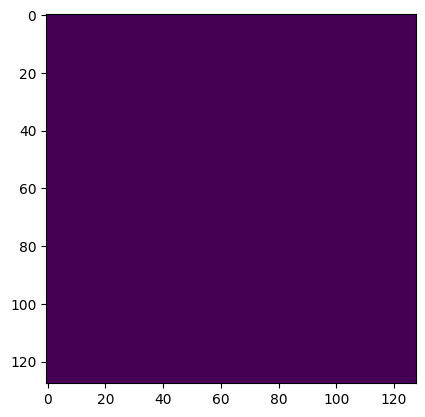

In [10]:
img,mask = data_dict[0]
print(img.shape)
plt.imshow(mask*255)
print(np.sum(mask))

In [11]:
from pathlib import Path

root_directory = Path(TRAIN_PATH)
total_size = sum(f.stat().st_size for f in root_directory.glob('**/*') if f.is_file())
print("Total size of the directory (using pathlib):", total_size/2**30, "GB")

Total size of the directory (using pathlib): 11.666088104248047 GB
